# Clustering math

# Decision Tree Manual Calculation Guide

## **Goal**
Find the best attribute to split on at each node by calculating information gain (or gini) for each attribute.

---

## **Key Formulas**

### **1. Entropy**
Measures impurity/uncertainty in a dataset.

$$Entropy(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)$$

Where:
- $p_i$ = proportion of class $i$ in dataset $S$
- $c$ = number of classes

**For binary classification (0/1):**
$$Entropy(S) = -p_0 \log_2(p_0) - p_1 \log_2(p_1)$$

### **2. Information Gain**
Reduction in entropy after splitting on attribute $A$.

$$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \times Entropy(S_v)$$

Where:
- $S$ = parent dataset
- $A$ = attribute to split on
- $S_v$ = subset where attribute $A$ has value $v$
- $\frac{|S_v|}{|S|}$ = proportion of examples with value $v$

### **3. Gini Impurity** (Alternative to Entropy)

$$Gini(S) = 1 - \sum_{i=1}^{c} p_i^2$$

---

## **Step-by-Step Process**

### **Step 1: Calculate Initial Entropy**
Count the labels in your dataset.

**Example:** 5 positive (label=1), 3 negative (label=0) out of 8 total

$$Entropy(S) = -\frac{5}{8}\log_2(\frac{5}{8}) - \frac{3}{8}\log_2(\frac{3}{8})$$

### **Step 2: For Each Feature (Attribute)**

For each of your 5 features, do the following:

**a) Split the data by attribute values**

Example: For feature "Age" with values {Young, Middle, Senior}:
- Group all rows where Age=Young
- Group all rows where Age=Middle  
- Group all rows where Age=Senior

**b) Calculate entropy for each subset**

For each group, count positives and negatives, then calculate entropy.

Example for Age=Young (2 positive, 1 negative):
$$Entropy(S_{Young}) = -\frac{2}{3}\log_2(\frac{2}{3}) - \frac{1}{3}\log_2(\frac{1}{3})$$

**c) Calculate weighted average entropy**

$$Weighted\ Entropy = \sum \frac{|S_v|}{|S|} \times Entropy(S_v)$$

Example:
$$= \frac{3}{8} \times Entropy(S_{Young}) + \frac{3}{8} \times Entropy(S_{Middle}) + \frac{2}{8} \times Entropy(S_{Senior})$$

**d) Calculate Information Gain**

$$Gain(S, Age) = Entropy(S) - Weighted\ Entropy$$

### **Step 3: Choose Root Node**
**Select the attribute with the HIGHEST information gain** as your root node.

### **Step 4: Repeat for Each Branch**
For each branch created by the split:
- If all examples have the same label → **Leaf node** (stop)
- If no examples → **Leaf node** with majority class
- Otherwise → Repeat Steps 1-3 on the subset

---

## **Quick Calculation Tips**

### **Common log₂ values:**
- $\log_2(1) = 0$
- $\log_2(0.5) = -1$
- $\log_2(0.25) = -2$
- $\log_2(0.125) = -3$

### **Special cases:**
- If $p_i = 0$: skip that term (since $0 \log_2(0) = 0$)
- If all examples same class: $Entropy = 0$
- Maximum entropy (50-50 split): $Entropy = 1$

### **Change of base formula:**
$$\log_2(x) = \frac{\log_{10}(x)}{\log_{10}(2)} = \frac{\ln(x)}{\ln(2)}$$

---

## **Python Helper Functions**
```python
import math

def entropy(counts):
    """Calculate entropy from class counts"""
    total = sum(counts)
    if total == 0:
        return 0
    
    ent = 0
    for count in counts:
        if count > 0:
            p = count / total
            ent -= p * math.log2(p)
    return ent

def information_gain(parent_counts, subsets):
    """
    Calculate information gain
    parent_counts: [pos, neg] in parent
    subsets: list of [pos, neg] for each subset
    """
    parent_entropy = entropy(parent_counts)
    parent_total = sum(parent_counts)
    
    weighted_entropy = 0
    for subset in subsets:
        subset_total = sum(subset)
        weight = subset_total / parent_total
        weighted_entropy += weight * entropy(subset)
    
    return parent_entropy - weighted_entropy

# Example usage:
# Parent: 5 Yes, 3 No
parent = [5, 3]
print(f"Parent Entropy: {entropy(parent):.4f}")

# After split on attribute: [2 Yes, 1 No], [2 Yes, 1 No], [1 Yes, 1 No]
subsets = [[2, 1], [2, 1], [1, 1]]
gain = information_gain(parent, subsets)
print(f"Information Gain: {gain:.4f}")

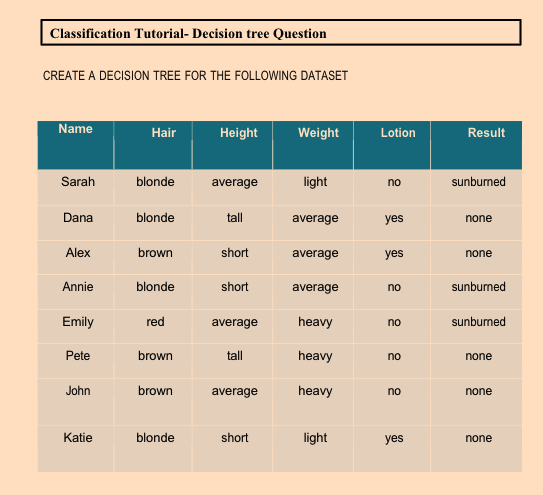

In [ ]:
from IPython.display import Image, display

display(Image(filename='./data/classification-dataset.png'))

In [41]:
import math

def entropy_dataset(t, label_groups):
    """
    Calculate entropy of overall dataset
    t: total number of items
    groups: subgroups of dataset label
    """
    probabilities = [ (x/t) * math.log2(x/t) for x in label_groups ]
    entropy = -1 * sum(probabilities)
    print(f'\nEntropy of dataset = {entropy}\n')
    return entropy


def entrop_set(feature_list):
    """Entropy of a feature
    [2 yes, 1 no, 3 neutral]
    """
    total = sum(feature_list)
    ent = 0
    for each in feature_list:
        if each > 0:
            proportion = each / total
            ent -= proportion * math.log2(proportion)
    return ent

def weighted_entropy(t, items):
    """
    t: number of rows
    items: set of features split by target label
    """
    entr = entrop_set(items)
    ratioed = (sum(items)/t) * entr
    return ratioed

def entropy_of_feature_class(name, dataset_entropy, feature_class_set):
    """
    Calculate entropy of a given feature
    feature_class_set: list: feature labels
    feature_class_set = list[list]
    each item in the inner list represent the split of the
    attribute values between different class labels
    e.g. [2 yes, 1 no, 3 neutral]
    """

    number_of_rows = sum([sum(each) for each in feature_class_set])

    total_entropy = 0
    for each_set in feature_class_set:
        featurn_entropy = weighted_entropy(number_of_rows, each_set)
        print(f'Entropy of {each_set} = {featurn_entropy}')
        total_entropy += featurn_entropy

    gain = dataset_entropy - total_entropy

    print(f'{name}\nEntropy = {total_entropy}, Gain = {gain}\n')
    return total_entropy, gain


ds_entropy = entropy_dataset(8, [3, 5])
entropy_of_feature_class('Hair', ds_entropy, [[2, 2], [0, 3], [1, 0]])
entropy_of_feature_class('Height', ds_entropy, [[1, 2], [2, 1], [0, 2]])
entropy_of_feature_class('Weight', ds_entropy, [[1, 1], [1, 2], [1, 2]])
entropy_of_feature_class('Lotion', ds_entropy, [[0, 3], [3, 2]])



Entropy of dataset = 0.954434002924965

Entropy of [2, 2] = 0.5
Entropy of [0, 3] = 0.0
Entropy of [1, 0] = 0.0
Hair
Entropy = 0.5, Gain = 0.45443400292496505

Entropy of [1, 2] = 0.3443609377704336
Entropy of [2, 1] = 0.3443609377704336
Entropy of [0, 2] = 0.0
Height
Entropy = 0.6887218755408672, Gain = 0.2657121273840979

Entropy of [1, 1] = 0.25
Entropy of [1, 2] = 0.3443609377704336
Entropy of [1, 2] = 0.3443609377704336
Weight
Entropy = 0.9387218755408671, Gain = 0.015712127384097996

Entropy of [0, 3] = 0.0
Entropy of [3, 2] = 0.6068441215341679
Lotion
Entropy = 0.6068441215341679, Gain = 0.34758988139079716



(0.6068441215341679, 0.34758988139079716)